In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data = pd.read_csv('Dataset/gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
features_na = [feature for feature in gold_data.columns if gold_data[feature].isnull().sum()>0]
if len(features_na) > 0:    
    for feature in features_na:
        print(feature,np.round(gold_data[feature].isnull().mean(),4),'%missing values')
else:
    print("No missing value found")

No missing value found


In [7]:
for column in gold_data.columns:
    print(column,gold_data[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [8]:
categorical_features = [feature for feature in gold_data.columns if ((gold_data[feature].dtypes=='O')& (feature not in ['GLD']))]
categorical_features

['Date']

In [9]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(gold_data[feature].unique())))

The feature is Date and number of categories are 2290


In [10]:
numerical_features = [feature for feature in gold_data.columns if (gold_data[feature].dtypes != 'O') and (feature != 'GLD')]
print('Number of numerical variables', len(numerical_features))

gold_data[numerical_features].head()

Number of numerical variables 4


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [11]:
discrete_feature = [feature for feature in numerical_features if len(gold_data[feature].unique())<25]
print('Discrete Variable Count : {}'.format(len(discrete_feature)))

Discrete Variable Count : 0


In [12]:
continous_features = [feature for feature in numerical_features if feature not in discrete_feature+['GLD']]
print("Continuos feature count {}".format(len(continous_features)))

Continuos feature count 4


C:\Users\kmrid\AppData\Local\Temp\ipykernel_6012\3952854012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data[continous_feature])
C:\Users\kmrid\AppData\Local\Temp\ipykernel_6012\3952854012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data[continous_feature])
C:\Users\kmr

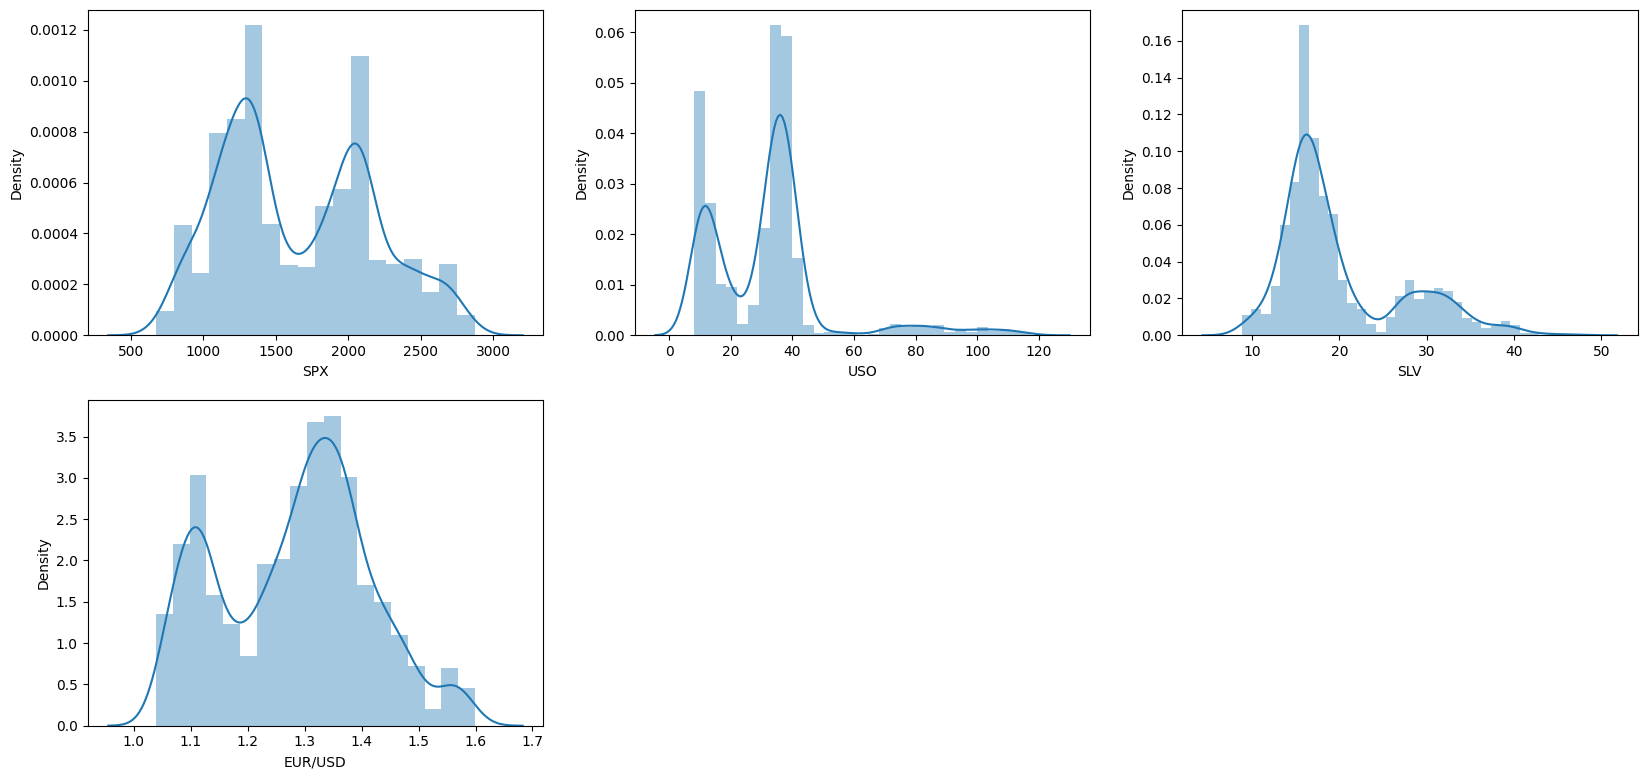

In [13]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for continous_feature in continous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(gold_data[continous_feature])
    plt.xlabel(continous_feature)
    plotnumber+=1
plt.show()


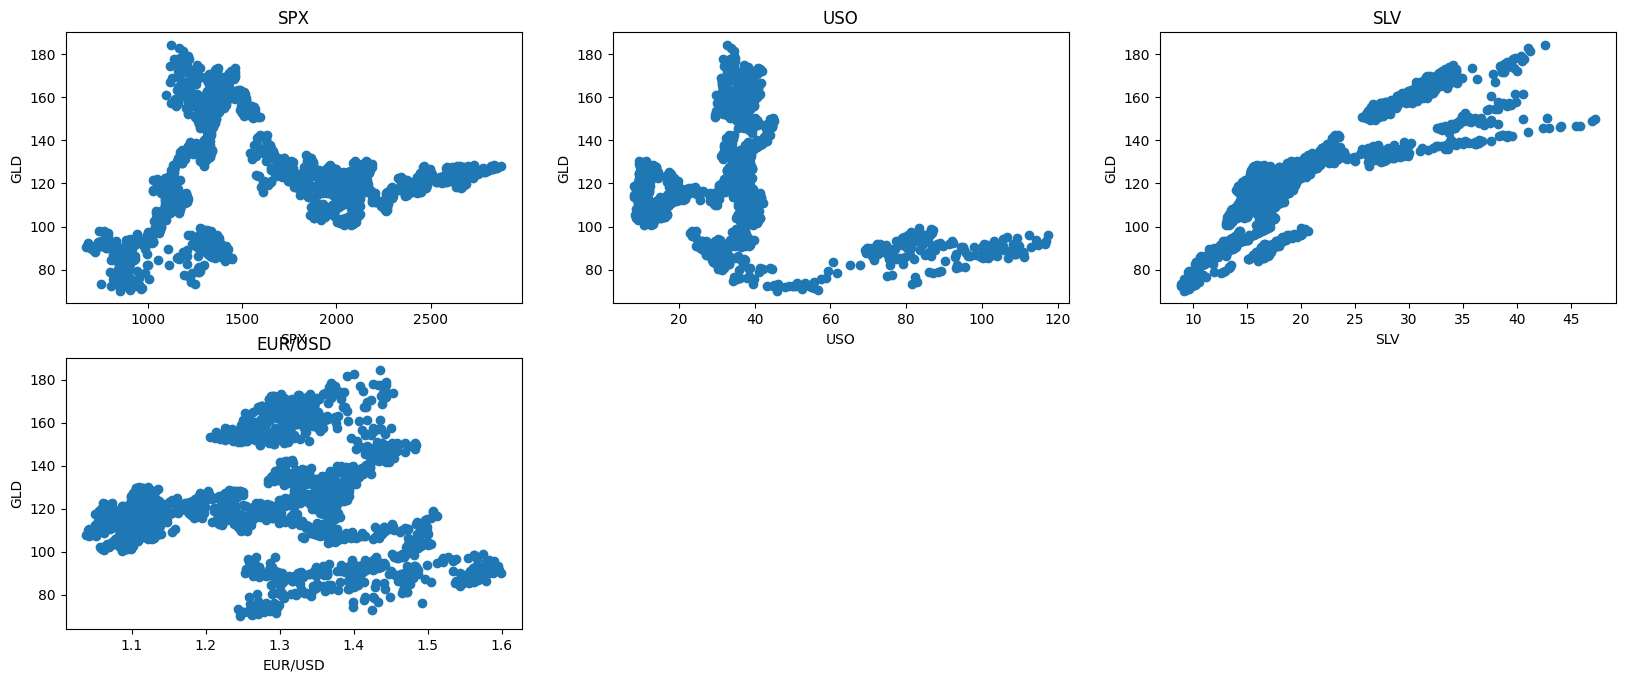

In [15]:
plt.figure(figsize=(20,50),facecolor='white')
plotnumber=1
for feature in continous_features:
    data = gold_data.copy()
    ax=plt.subplot(12,3, plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber+=1
plt.show()

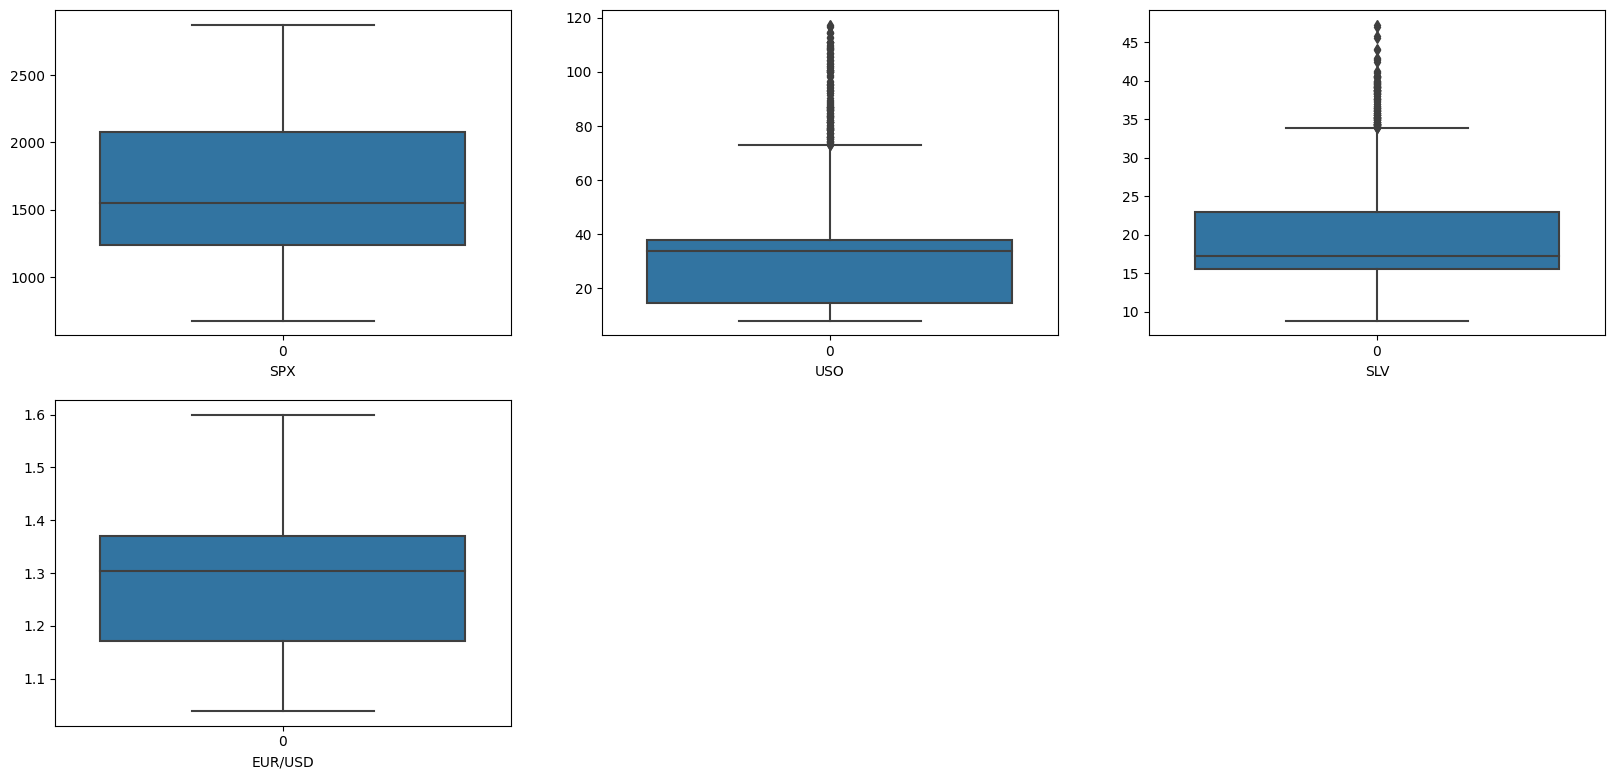

In [16]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1

for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(gold_data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [20]:
gold_data_df = gold_data.drop('Date', axis=1)


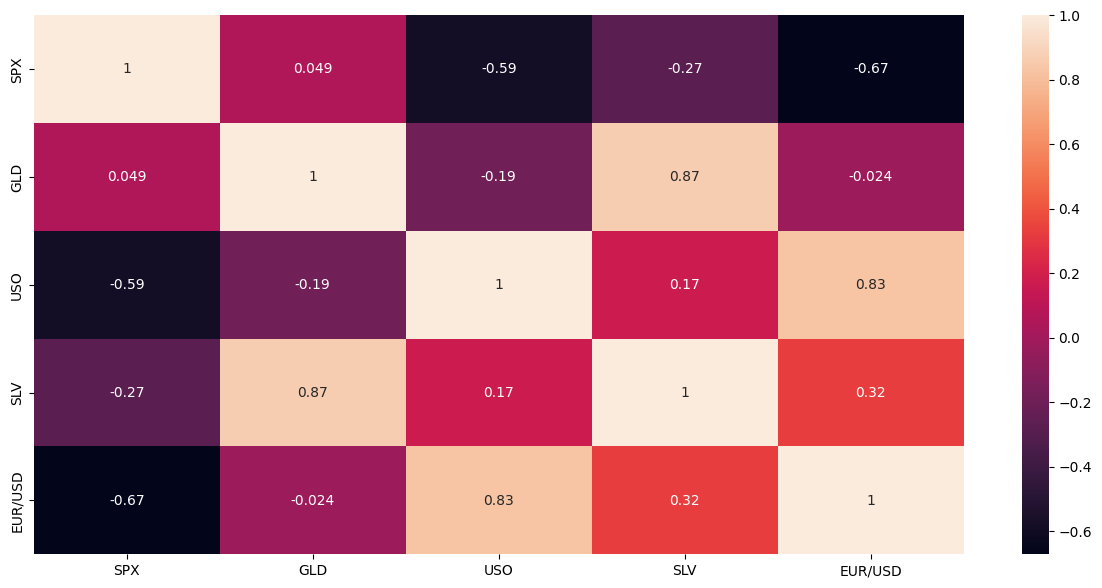

<Figure size 640x480 with 0 Axes>

In [21]:
cor_mat = gold_data_df.corr()
fig =plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()


In [24]:
gold_data_2=gold_data.copy()
gold_data_2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [26]:
gold_data_2.drop(['Date'],axis=1,inplace=True)

In [27]:
X = gold_data_2.drop(['GLD'],axis=1)
y=gold_data_2['GLD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [35]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'decision_tree': {
            'model':DecisionTreeRegressor(),
            'params': {
                'criterion':['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        },
        'RandomForestRegressor': {
            'model':RandomForestRegressor(),
            'params': {
                'n_estimators': [10,50,100,130],
                'criterion':['friedman_mse'],
                'max_depth': range(2,4,1),
                'max_features': ['auto', 'log2']
            }
        },
        'XGBRegressor': {
            'model':XGBRegressor(),
            'params': {
                'learning_rate': [0.5,0.1,0.01,0.001],
                'max_depth': [2,3],
                'n_estimators':[10.50,100,200]
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [36]:
pd.set_option('display.max_colwidth',100)
find_best_model_using_gridsearchcv(X,y)

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "d:\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "d:\Python\Python311\Lib\site-packages\sklearn\base.py", line 600, in _validate_params


,model,best_score,best_params
0,decision_tree,0.981076,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
1,RandomForestRegressor,0.911328,"{'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 130}"
2,XGBRegressor,0.984461,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}"


In [37]:
model_xgb =XGBRegressor(learning_rate=0.5,max_depth=3,n_estimators=200)

In [38]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [39]:
model_xgb.score(X_test,y_test)

0.9875798991169574

In [40]:
y_pred = model_xgb.predict(X_test)